# Calculate sparse matrix conversion times

In [ ]:
%matplotlib inline

In [50]:
import matplotlib
import pandas as pd
import scipy as sp
import scipy.sparse as S
import timeit
import seaborn as sns

In [42]:
sns.set(palette='Set2')
sns.despine()

In [40]:
sp.__version__

'0.17.0'

Set up the tests

In [27]:
R = S.rand(10000, 10000)
formats = ['csr', 'coo', 'csc', 'dia', 'lil', 'dok', 'bsr']
runs = 10

Run the profiling

In [54]:
%time
profiling_data = []
for from_ in formats:
    tmp = R.asformat(from_)
    for to_ in formats:
        mean_run_time = timeit.timeit(lambda: tmp.asformat(to_), number=runs)
        
        print('Done {} to {}'.format(from_, to_))
        profiling_data.append({
                'from': from_,
                'to': to_,
                'time': mean_run_time
        })
    

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.96 µs
Done csr to csr
Done csr to coo
Done csr to csc


/Users/musically_ut/.virtualenvs/scipy-sparse-benchmark/lib/python3.5/site-packages/scipy/sparse/coo.py:360: SparseEfficiencyWarning: Constructing a DIA matrix with 19814 diagonals is inefficient
  "is inefficient" % len(diags), SparseEfficiencyWarning)


Done csr to dia
Done csr to lil
Done csr to dok
Done csr to bsr
Done coo to csr
Done coo to coo
Done coo to csc
Done coo to dia
Done coo to lil
Done coo to dok
Done coo to bsr
Done csc to csr
Done csc to coo
Done csc to csc
Done csc to dia
Done csc to lil
Done csc to dok
Done csc to bsr
Done dia to csr
Done dia to coo
Done dia to csc
Done dia to dia
Done dia to lil
Done dia to dok
Done dia to bsr
Done lil to csr
Done lil to coo
Done lil to csc
Done lil to dia
Done lil to lil
Done lil to dok
Done lil to bsr
Done dok to csr
Done dok to coo
Done dok to csc
Done dok to dia
Done dok to lil
Done dok to dok
Done dok to bsr
Done bsr to csr
Done bsr to coo
Done bsr to csc
Done bsr to dia
Done bsr to lil
Done bsr to dok
Done bsr to bsr


In [34]:
df = pd.DataFrame.from_records(profiling_data)

In [48]:
conv_data_matrix = df.pivot('from', 'to', 'mean_time')

In [49]:
conv_data_matrix

to,bsr,coo,csc,csr,dia,dok,lil
from,,,,,,,
bsr,728.146028,699.574206,700.244540,699.073762,705.708206,721.951158,712.364218
coo,150.295508,122.795984,123.343313,122.338620,128.914163,144.643758,135.601739
csc,178.893901,151.180415,151.249629,150.903204,156.022782,172.056971,162.168196
csr,121.694293,95.517117,95.835970,95.414588,100.719860,115.481313,106.434383
dia,495.049977,262.017356,310.987225,212.846095,334.084834,436.516006,367.086054
dok,689.503858,600.509654,620.167325,580.865142,643.940421,678.839947,668.448575
lil,566.508840,523.468967,528.682984,518.824456,538.794193,555.364641,545.138009


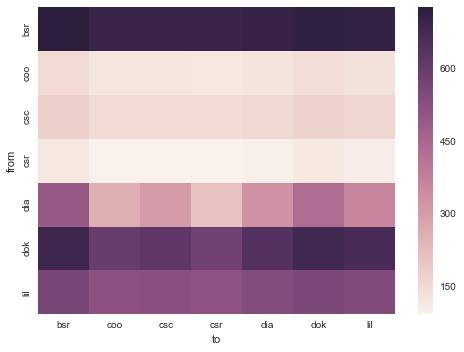

In [43]:
sns.heatmap(conv_data_matrix)